# Practica Final Machine Learning

## INTRODUCCIÓN

Nuestro objetivo en esta práctica será mediante técnicas de aprendizaje supervisado crear un evaluador automático de precios de alojamientos.
Para ello precisamos de una base de datos de la empresa Airbnb, que nos muestra diferentes características sobre los estos pisos.


## ANÁLISIS DEL DATASET

Vamos a observar como está compuesto nuestro dataset.
Antes de todo necesitamos importar las primeras librerías que vamos a utilizar

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
data = pd.read_csv("Airbnb_listings_extract_2.csv",sep=",",low_memory=False)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Airbnb_listings_extract_2.csv'

In [65]:
data=pd.read_csv('C:/Users/aleja_l/Desktop/MACHINE-LEARNING/TrabajoFinalML/airbnb-listings-extract.csv',sep=';',low_memory=False)
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [66]:
pd.options.display.max_rows = 89

In [67]:
data.shape

(14780, 89)

Podemos observar que disponemos de 89 variables que nos aportan características relevantes a los pisos.
También contamos con 14780 observaciones.
Vamos a observar la estadística descriptiva de nuestras características:

In [68]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


Observamos que nuestras variables están en diferentes escalas, por lo que más tarde será necesario escalar y normalizar nuestros datos para que no se preduzcan anomalías en nuestros modelos predictivos.

Vamos a analizar y conocer mejor estas variables:

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

Podemos observar los diferentes tipos de cada variable, donde contamos tanto con variables continuas como categóricas, que posteriormente serán necesario tratarlas.
También vemos que un gran número de variables cuentan con valores missings, que también tendremos analizar para que nuestro estudio sea más preciso.
Nuestro objetivo es intentar predecir el precio de los alojamientos, por lo que es imprescindible ver como estará distribuida nuestra variable objetivo, en nuestro caso es 'Price'.

### DISTRIBUCIÓN VARIABLE OBJEIVO 'PRICE'

Vamos a observar diferentes parámetros descriptivos de nuestra variable:

In [70]:
data['Price'].describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

Vemos que la media es 73€, aunque el mínimo es 9€ y el máximos es 999€

In [71]:
print(data['Price'].median())
print(data['Price'].mode())

55.0
0    50.0
dtype: float64


Vamos a observar los diferentes valores que toma nuestra variable objetivo:

In [72]:
porcentaje_price=data['Price'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()
contar_price = data['Price'].value_counts().reset_index()
dist_price = pd.merge(porcentaje_price, contar_price, on=['index'], how='inner')
dist_price

,index,porcentaje,Price
0,50.0,4.443541,656
1,60.0,3.901646,576
2,25.0,3.711983,548
3,30.0,3.684888,544
4,35.0,3.237824,478
...,...,...,...
365,184.0,0.006774,1
366,800.0,0.006774,1
367,329.0,0.006774,1
368,907.0,0.006774,1


Podemos ver los valores de los precios y el porcentaje de veces que aparece en nuestro dataset.
Vamos a ver gráficamente la densidad de los valores de la variable con un histograma

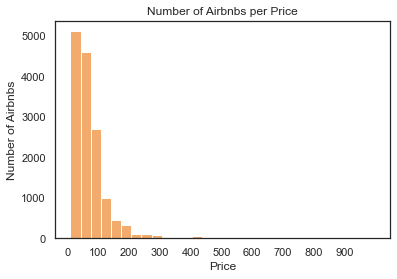

In [73]:
plt.hist(data.Price, bins=30, color='#F2AB6D')
plt.xticks(np.arange(0, np.max(data.Price),100))
plt.xlabel("Price")
plt.ylabel("Number of Airbnbs")
plt.title("Number of Airbnbs per Price")
plt.show()

Vemos que la mayor parte de los precios se encuentran entre 9€ y 200€. También hay otros alojamientos, seguramente con mayores prestaciones, con precios muchos más alto. Será interesante en nuestro estudio observar que características están más relacionadas con precios altos, así también con los precios bajos.

## PREPROCESSING

Una vez ya visto nuestro dataset y habiendo fijado nuestros objetivos, para enriquecer nuestro estudio y que sea mucho más preciso vamos a tratar los datos de los que disponemos, para tener un dataset limpio y ordenado, entendiendo mucho mejor cómo afectan las características al precio y cuáles son las más óptimas para realizar nuestros modelos.

Lo primero que vamos a hacer es eliminar la variable 'ID'  ya que es una forma distinta de denotar lo mismo, en este caso el alojamiento concreto, y ya disponemos de esa información con la observación.

In [74]:
data = data.drop(['ID'], axis=1)

De la misma forma vamos a eliminar la variable 'Host Name' ya que ya tenemos una manera de identificar el host que es con su id, además de qué el nombre del dueño no influirá en el precio del piso.

In [75]:
data = data.drop(['Host Name'], axis=1)

A continuación vamos a eliminar todas las variable tipo 'Url', ya que no nos aportan información (aunque podría resultar interesante realizar algún estudio sobre el contenido de estos links e implementarlo a nuestro trabajo) y solo entorpecerán nuestro objetivo. 
Primero vemos cuáles son:

In [76]:
url= [s for s in data if "Url"  in s]
url=list(url)
print(url)

['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url']


In [77]:
URL=[s for s in data if "URL"  in s]
URL=list(URL)
print(URL)

['Host URL']


Quitamos estas variables de nuestro dataset

In [78]:
data_new_1=data.drop(columns=url)
data_new_1=data_new_1.drop(columns=URL)
data_new_1.shape

(14780, 79)

También vamos a eliminar todas aquellas variables que sean párrafos, ya que entorpecen nuestro estudio, y esa información esta recogida dentro de otras variables.
También pondremos un ejemplo gráfico para ver si alguna de estas variables afecta realmente al precio.
(Quedarnos con las que pueden ser suma de electrodomésticos, internet,etc..)

In [79]:
data_new_1=data_new_1.drop(columns=['Name','Description','Summary','Space','Neighborhood Overview','Notes','Transit','Access',
                          'Interaction','House Rules','Host About','Host Neighbourhood',
                            'Street','Neighbourhood','Amenities','State','Market',
                            'Country','Jurisdiction Names'], axis=1)
data_new_1.shape

(14780, 60)

### MISSINGS

Será muy necesario tratar los valores missings de nuestras variables para que no hayan anomalías en nuestro estudio. Tendremos que tratarlos de manera óptima para que no se pierda ni se distorsione nuestra informaciíon mientras dejamos nuestro dataset sin valores missings.
Con el siguiente código vamos a ver el porcentaje de missings que tienen nuestras variables:

In [80]:
df_nulos_col =data_new_1.isnull().sum()
pd_series_null_rows = data_new_1.isnull().sum(axis=1).sort_values(ascending=False)
pd_null_columnas=pd.DataFrame(df_nulos_col, columns=['nulos_columnas'])
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/data_new_1.shape[0]
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/data_new_1.shape[1]

In [81]:
pd_null_columnas

,nulos_columnas,porcentaje_columnas
Scrape ID,0,0.000000
Last Scraped,0,0.000000
Experiences Offered,0,0.000000
Host ID,0,0.000000
Host Since,3,0.000203
Host Location,43,0.002909
Host Response Time,1899,0.128484
Host Response Rate,1899,0.128484
Host Acceptance Rate,14741,0.997361
Host Listings Count,3,0.000203


Hacemos lo mismo por filas, es decir vamos a ver el porcentaje de missings que tiene cada observación:

In [82]:
pd_null_filas

,nulos_filas,porcentaje_filas
8891,24,0.400000
14255,24,0.400000
3317,23,0.383333
94,23,0.383333
10313,23,0.383333
...,...,...
1374,2,0.033333
4978,2,0.033333
6932,2,0.033333
2135,2,0.033333


A continuación vamos a eliminar de nuestro dataset todas aquellas variable con un valor supeior al 70% de valores missings en ella, ya que serán variable de la que apenas podremos sacar información valiosa y solo entorpecerán nuestro estudio.
Lo realizamos con el siguiente código:

In [83]:
threshold=0.7
list_vars_not_null = list(pd_null_columnas[pd_null_columnas['porcentaje_columnas']<threshold].index)
df_filter_null = data_new_1.loc[:, list_vars_not_null]
df_filter_null.shape

(14780, 54)

Renombramos nuestro dataset y observamos como ha quedado:

In [84]:
df1= df_filter_null
df1.head()

,Scrape ID,Last Scraped,Experiences Offered,Host ID,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,20170306202425,2017-03-07,none,58386783,2016-02-11,My father was USAF so I was born at Offutt AFB...,within an hour,100.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,20170407214050,2017-04-08,none,102947901,2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,...,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,20170407214050,2017-04-08,none,102947901,2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,...,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,20170407214050,2017-04-08,none,131794,2010-05-25,"Barcelona, Cataluña, Spain",within an hour,100.0,27.0,27.0,...,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,20170407214050,2017-04-08,none,54310958,2016-01-12,"Madrid, Community of Madrid, Spain",within an hour,99.0,207.0,207.0,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


Por filas observamos que no tenemos ninguna observación relevante que eliminar

In [85]:
index_null_filas = np.where(pd_null_filas['porcentaje_filas']>= 0.6)[0]
index_null_filas = list(index_null_filas)
print(index_null_filas)

[]


Ahora vamos a interiorzar los tipos de variables que tenemos, y vamos a dividirlas en dos listas, una que contenga las variables categóricas y otras las numéricas, que nos resultará muy útil para despues tratarlas por separado.

In [86]:
df1.dtypes

Scrape ID                           int64
Last Scraped                       object
Experiences Offered                object
Host ID                             int64
Host Since                         object
Host Location                      object
Host Response Time                 object
Host Response Rate                float64
Host Listings Count               float64
Host Total Listings Count         float64
Host Verifications                 object
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
City                               object
Zipcode                            object
Smart Location                     object
Country Code                       object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          

In [87]:
Var_discretas=list(df1.select_dtypes('object').columns) #Lista de variables categóricas
Var_discretas

['Last Scraped',
 'Experiences Offered',
 'Host Since',
 'Host Location',
 'Host Response Time',
 'Host Verifications',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'Zipcode',
 'Smart Location',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Calendar Updated',
 'Calendar last Scraped',
 'First Review',
 'Last Review',
 'Cancellation Policy',
 'Geolocation',
 'Features']

In [88]:
Var_continuas=list(df1.select_dtypes(np.number).columns) #Lista variables continuas
Var_continuas

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Host Total Listings Count',
 'Latitude',
 'Longitude',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Calculated host listings count',
 'Reviews per Month']

Vamos a proceder ahora a seguir tratando los missings que tenemos en nuestro dataset, para ello vamos a sustituir estos valores missings por la moda en las variables categóricas y por la mediana en las variables numéricas

In [89]:
df1[Var_discretas]=df1[Var_discretas].fillna(df1[Var_discretas].mode())
df1[Var_continuas]=df1[Var_continuas].fillna(df1[Var_continuas].median())

Vamos a observar si se han reemplazado todos los missings

In [90]:
df1.isnull().sum()

Scrape ID                            0
Last Scraped                         0
Experiences Offered                  0
Host ID                              0
Host Since                           3
Host Location                       43
Host Response Time                1899
Host Response Rate                   0
Host Listings Count                  0
Host Total Listings Count            0
Host Verifications                   6
Neighbourhood Cleansed               0
Neighbourhood Group Cleansed      1019
City                                 6
Zipcode                            506
Smart Location                       0
Country Code                         0
Latitude                             0
Longitude                            0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                                 0
Bed Type                 

Observamos que hay variables que aún contienen missings, todas ellas categóricas, así que vamos a seleccionar estas variables y vamos a imputar los missings denotándolos para identificar que no tienen valor, nos será útil ya que posteriormente transformaremos estas variables categóricas.
Primero las seleccionamos:

In [91]:
columnas =list(df1.columns)
index = list(np.where(df1[columnas].isnull().sum() !=0)[0])
col_missing = df1.columns[index]
col_missing

Index(['Host Since', 'Host Location', 'Host Response Time',
       'Host Verifications', 'Neighbourhood Group Cleansed', 'City', 'Zipcode',
       'First Review', 'Last Review', 'Features'],
      dtype='object')

Reemplezamos los missings en estas variables y procedemos a comprobar que se hayan eliminado todos los valores missings de nuestro dataset.

In [92]:
df1[col_missing] = df1[col_missing].fillna('Sin Valor')

In [93]:
df1.isnull().sum()

Scrape ID                         0
Last Scraped                      0
Experiences Offered               0
Host ID                           0
Host Since                        0
Host Location                     0
Host Response Time                0
Host Response Rate                0
Host Listings Count               0
Host Total Listings Count         0
Host Verifications                0
Neighbourhood Cleansed            0
Neighbourhood Group Cleansed      0
City                              0
Zipcode                           0
Smart Location                    0
Country Code                      0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Price                             0
Security Deposit            

Como podemos observar ya nos contamos con valores missings en nuestro dataset.
Ahora vamos a estudiar las correlaciones de nuestras variables:

### CORRELACIONES

Vamos a ver la correlación entre estas variables numéricas ya que posteriormente puede mejorar nuestro estudio eliminar aquellas que aporten gran cantidad de información similar, y ver si tiene sentido realizar un análisis de componentes principales para optimizar nuestro estudio.
Observamos la matriz de correlaciones de nuestras variables numéricas:

In [94]:
df1_cor=df1[Var_continuas].corr(method='pearson')
df1_cor

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
Scrape ID,1.000000,0.038972,0.007997,0.010549,0.010549,-0.038847,0.163784,-0.001419,0.001065,-0.002246,...,0.004170,-0.010181,-0.019608,-0.007755,-0.007995,-0.007292,-0.006267,-0.017290,0.009236,-0.016660
Host ID,0.038972,1.000000,-0.012463,-0.078729,-0.078729,-0.006227,0.019640,-0.101089,-0.058871,-0.075857,...,-0.244239,0.045219,0.092866,0.085526,0.077072,0.069904,0.049598,0.005551,-0.120852,0.100034
Host Response Rate,0.007997,-0.012463,1.000000,-0.022519,-0.022519,-0.013900,0.006574,0.040288,-0.027725,0.008425,...,0.102884,0.056875,0.031045,0.040492,0.049756,0.045435,0.008996,0.075407,-0.042163,0.135497
Host Listings Count,0.010549,-0.078729,-0.022519,1.000000,1.000000,0.001563,0.049432,0.227165,0.234428,0.186003,...,-0.115634,-0.097818,-0.039177,-0.000924,-0.138913,-0.121377,-0.000404,-0.121445,0.922842,-0.133723
Host Total Listings Count,0.010549,-0.078729,-0.022519,1.000000,1.000000,0.001563,0.049432,0.227165,0.234428,0.186003,...,-0.115634,-0.097818,-0.039177,-0.000924,-0.138913,-0.121377,-0.000404,-0.121445,0.922842,-0.133723
Latitude,-0.038847,-0.006227,-0.013900,0.001563,0.001563,1.000000,-0.480274,0.003572,-0.013852,-0.014495,...,0.015306,-0.017441,-0.021835,-0.023133,-0.014062,-0.016324,-0.027307,-0.008137,-0.002634,0.014651
Longitude,0.163784,0.019640,0.006574,0.049432,0.049432,-0.480274,1.000000,0.018850,0.029499,0.039928,...,-0.026993,-0.008907,0.001525,0.014281,-0.005936,-0.008528,-0.006659,-0.022276,0.050815,-0.020597
Accommodates,-0.001419,-0.101089,0.040288,0.227165,0.227165,0.003572,0.018850,1.000000,0.430835,0.723412,...,0.053389,-0.059784,-0.075940,-0.044941,-0.085565,-0.068891,-0.012932,-0.045808,0.254854,0.030019
Bathrooms,0.001065,-0.058871,-0.027725,0.234428,0.234428,-0.013852,0.029499,0.430835,1.000000,0.524489,...,-0.076919,0.019941,0.028232,0.031498,-0.016521,-0.014235,0.025434,-0.013589,0.287173,-0.083419
Bedrooms,-0.002246,-0.075857,0.008425,0.186003,0.186003,-0.014495,0.039928,0.723412,0.524489,1.000000,...,-0.049190,0.008406,-0.001164,0.005736,-0.026346,-0.011166,-0.023877,-0.010527,0.219415,-0.064519


Podemos observar el mapa de estas correlaciones oara verlo todo más visual con la siguiente función:

In [95]:
def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[10,8]):
    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    corr = dataset.corr(method=metodo) 
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    f, ax = plt.subplots(figsize=size_figure)
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) 
    plt.show()
    
    return 0

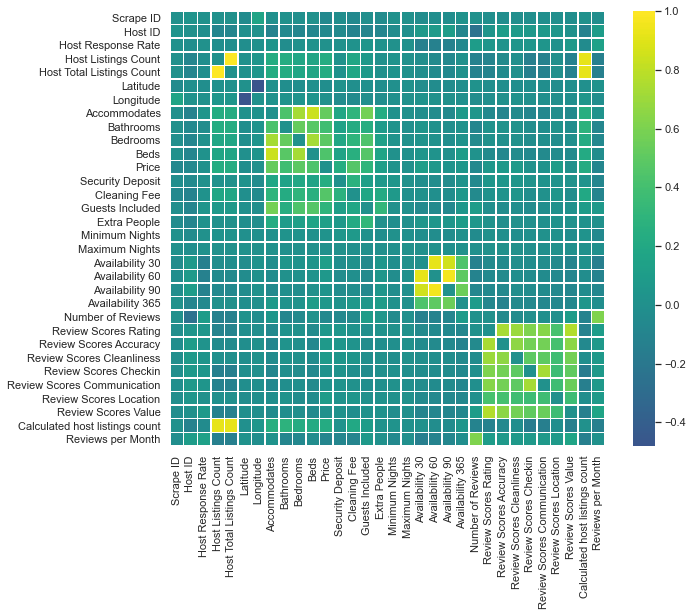

0

In [96]:
get_corr_matrix(dataset = df1[Var_continuas], metodo = 'pearson')

Podemos observar visualmente que hay como 3 grupos de variables muy correladas, el primero hace referencia las variables que describen el propio piso y sus capacidades y políticas('Accommodates', 'Beds', 'Security Deposit', etc..).
También tenemos otro que hace referencia la disponibilidad del alojamiento en cantidades de días.
Y por último el tercer grupo de variables muy correladas entre sí son las que hacen referencia a los 'Review Scores'

Vamos a analizar la correlación de las variables con nuestra variable objetivo 'Price':

In [97]:
df1_cor['Price']

Scrape ID                        -0.056937
Host ID                          -0.053114
Host Response Rate                0.004907
Host Listings Count               0.226505
Host Total Listings Count         0.226505
Latitude                         -0.020303
Longitude                         0.000802
Accommodates                      0.520432
Bathrooms                         0.383238
Bedrooms                          0.495599
Beds                              0.440032
Price                             1.000000
Security Deposit                  0.238390
Cleaning Fee                      0.464952
Guests Included                   0.300520
Extra People                      0.123123
Minimum Nights                    0.027427
Maximum Nights                    0.001530
Availability 30                   0.109988
Availability 60                   0.068016
Availability 90                   0.035855
Availability 365                  0.061177
Number of Reviews                -0.058428
Review Scor

Vemos que las variables más correlacionadas con 'Price' son 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee', 'Guest Included' 'Security Deposit' y las variables relacionadas con 'Host Listings Count', por lo que estas caractrísticas podrán tener un peso importante en nuestros modelos.
También podemos observar que las variables 'Longitude' y 'Latitude' apenas están correlacionadas con el precio. Podría ser interesante eliminarlas de nuestro dataset ya que apenas nos aportarán información a los modelos, además tenemos otras muchas variables que nos indican la ubicación del alojamiento como 'City, 'Smart Location', etc..

También podríamos eliminar las variables 'Maximum Nights' y 'Review Scores Value' ya que su aportación al precio es mínima.

In [98]:
df1 = df1.drop(['Latitude','Longitude','Maximum Nights','Review Scores Value'], axis = 1)

In [99]:
Var_continuas=list(df1.select_dtypes(np.number).columns) #Lista variables continuas
Var_continuas

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Host Total Listings Count',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Calculated host listings count',
 'Reviews per Month']

Ahora vamos a ver las variables que tengan una correlación alta entre ellas, ya que podría ser muy útil para enriquecer nuestro dataset quedarnos con las variables que expliquen la mayor parte de la información de los datos, ya que si dos variables están muy correladas podríamos elegir solo 1 para explicar esa cantidad de información.
Vamos a observar las que tengan una correlación superior a 0.65:

In [100]:
corr = df1[Var_continuas].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1)
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.65]

,level_0,level_1,correlation
115,Host Total Listings Count,Host Listings Count,1.000000
492,Availability 90,Availability 60,0.963501
731,Calculated host listings count,Host Listings Count,0.922842
732,Calculated host listings count,Host Total Listings Count,0.922842
463,Availability 60,Availability 30,0.921476
491,Availability 90,Availability 30,0.849756
229,Beds,Accommodates,0.837126
608,Review Scores Accuracy,Review Scores Rating,0.735448
231,Beds,Bedrooms,0.731142
695,Review Scores Communication,Review Scores Checkin,0.726319


Con la siguiente función vamos a poder seleccionar estas variables que hemos visto antes y tener en una lista las variables cuya información esta recogida en otras( por ejemplo no aparece la variable 'Accommodates' ya que es la que explica la información de 'Beds' o 'Bedrooms' que en cambio sí aparecen) por lo que podremos eliminarlas después, nos basta con introducir nuestras variables y un threshold, en nuestro caso 0,65:

In [101]:
def correlation(x,threshold):
    correlated_cols=[]
    corr_matrix=x.corr('pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.append(colname)
    return correlated_cols

In [102]:
correlation(df1[Var_continuas], 0.65)

['Host Total Listings Count',
 'Bedrooms',
 'Beds',
 'Beds',
 'Availability 60',
 'Availability 90',
 'Availability 90',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Cleanliness',
 'Review Scores Communication',
 'Calculated host listings count',
 'Calculated host listings count']

Vemos que algunas variables aparecen repetidas ya que están correladas con más de una, con la función set podremos coger la lista con valores únicos que es lo que nos interesa:

In [103]:
lista = set(correlation(df1[Var_continuas], 0.65))
variables_cor = list(lista)
variables_cor

['Review Scores Cleanliness',
 'Review Scores Communication',
 'Availability 90',
 'Review Scores Accuracy',
 'Host Total Listings Count',
 'Beds',
 'Bedrooms',
 'Availability 60',
 'Calculated host listings count']

Ahora procedemos a eliminar estas variables de nuestro dataset:

In [104]:
df1=df1.drop(columns=['Review Scores Communication','Beds','Calculated host listings count','Review Scores Accuracy',
                      'Host Total Listings Count','Availability 90','Availability 60','Bedrooms'], axis=1)
df1.shape

(14780, 42)

#### ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

Ahora vamos a realizar un análisis de componentes principales de nuestras variables continuas para que la mayor cantidad de información quede recogida en menos dimensiones.
Primero vamos a eliminar de este conjunto de variables la variable Price ya que es la que vamos a intentar predecir.

In [105]:
Var_continuas2 = list(df1.select_dtypes(np.number).columns)
Var_continuas2

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Accommodates',
 'Bathrooms',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Availability 30',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Location',
 'Reviews per Month']

In [106]:
Var_continuas2.pop(6)
Var_continuas2

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Accommodates',
 'Bathrooms',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Availability 30',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Location',
 'Reviews per Month']

Como se puede observar se ha eliminado la variable 'Price' de nuestra lista de variables numéricas sobre la que se pretende realizar el análisis de componentes principales.
Ahora se van a importar las librerías que se necesitanpara dicho análisis:

In [107]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

Primero se van a analizar la estadística descriptiva de nuestra nueva lista de variable numéricas:

In [108]:
df1[Var_continuas2].describe()

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Location,Reviews per Month
count,1.478000e+04,1.478000e+04,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000
mean,2.017037e+13,3.608080e+07,95.488566,12.511502,3.277808,1.280683,166.603721,28.999865,1.589986,7.690460,3.050474,8.954736,202.104465,22.632273,92.212585,9.479635,9.707172,9.637889,1.726673
std,5.667971e+08,3.425360e+07,14.310050,34.087092,2.097291,0.657514,77.379974,23.908403,1.182550,12.971352,12.266517,9.333252,127.886822,38.290244,7.978675,0.915574,0.723806,0.708946,1.678401
min,2.016010e+13,1.745300e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,0.020000
25%,2.017041e+13,6.787360e+06,100.000000,1.000000,2.000000,1.000000,150.000000,20.000000,1.000000,0.000000,1.000000,0.000000,78.000000,1.000000,90.000000,9.000000,10.000000,9.000000,0.610000
50%,2.017041e+13,2.464875e+07,100.000000,2.000000,3.000000,1.000000,150.000000,25.000000,1.000000,0.000000,2.000000,6.000000,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,1.200000
75%,2.017041e+13,5.432919e+07,100.000000,6.000000,4.000000,1.000000,150.000000,30.000000,2.000000,15.000000,3.000000,14.000000,319.000000,27.000000,97.000000,10.000000,10.000000,10.000000,2.220000
max,2.017062e+13,1.247534e+08,100.000000,519.000000,16.000000,8.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,30.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,17.210000


El PCA identifica las direcciones con mayor varianza, por tanto será necesario estandarizar los datos ya que la escala de las variables es diferente, y entonces las variables con mayor escala dominarían al resto. Esto se consigue gracias a 'Pipeline'.
Por tanto nuestro modelo PCA quedará de la siguiente forma:

In [109]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df1[Var_continuas2])
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_ #Matriz que contiene a las componentes principales

array([[ 7.90189438e-04, -1.22574704e-01, -6.31975892e-02,
         1.57826421e-01,  2.07394749e-01,  1.24519200e-01,
         4.02682537e-02,  1.06742088e-01,  1.41936486e-01,
         8.61248902e-02,  2.18043237e-02,  8.26514708e-02,
         1.26866237e-01, -3.12135599e-02, -5.01707516e-01,
        -4.64987421e-01, -4.64178598e-01, -3.58250994e-01,
        -1.44464252e-01],
       [-3.47516654e-02, -1.14457031e-01,  4.77860421e-02,
         1.94418748e-01,  4.67205759e-01,  3.71142353e-01,
         2.55205942e-01,  3.67549261e-01,  4.12934136e-01,
         2.83994288e-01,  4.37884994e-02, -1.55868022e-02,
         5.95416355e-02,  2.18965529e-02,  1.99964362e-01,
         2.04714591e-01,  1.40405147e-01,  1.74272475e-01,
         5.35180767e-03],
       [-1.17532357e-03, -1.50602076e-01,  2.24598223e-01,
        -1.62971980e-01,  9.56312998e-02, -1.13407161e-01,
        -1.06225894e-01, -9.87761782e-02,  1.80350237e-01,
         9.61866793e-02, -7.99323659e-02, -2.63833189e-01,
    

Se va a convertir nuestro modelo en dataset para que sea mucho más intuitivo y fácil estudiar nuestras componentes

In [110]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df1[Var_continuas2].columns,
    index   = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
               'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Location,Reviews per Month
PC1,0.000790,-0.122575,-0.063198,0.157826,0.207395,0.124519,0.040268,0.106742,0.141936,0.086125,0.021804,0.082651,0.126866,-0.031214,-0.501708,-0.464987,-0.464179,-0.358251,-0.144464
PC2,-0.034752,-0.114457,0.047786,0.194419,0.467206,0.371142,0.255206,0.367549,0.412934,0.283994,0.043788,-0.015587,0.059542,0.021897,0.199964,0.204715,0.140405,0.174272,0.005352
PC3,-0.001175,-0.150602,0.224598,-0.162972,0.095631,-0.113407,-0.106226,-0.098776,0.180350,0.096187,-0.079932,-0.263833,-0.043892,0.620414,-0.062839,-0.106195,-0.063138,-0.050394,0.575238
PC4,0.037697,0.021463,0.169328,0.200813,0.039313,0.090969,0.059921,0.036456,-0.020032,-0.187330,0.090181,-0.622108,-0.658364,-0.167960,-0.052414,-0.059234,-0.071167,-0.001889,-0.103717
PC5,-0.304355,-0.588323,0.054211,-0.053013,-0.228530,-0.182360,0.310854,0.276214,-0.259779,-0.015860,0.415645,-0.077945,0.087202,0.153250,0.037703,-0.012730,0.015147,0.004946,-0.132624
PC6,-0.369028,0.340857,0.136325,-0.529298,-0.037361,-0.249127,0.284563,0.115219,0.172569,0.391695,-0.081554,-0.039288,-0.159662,-0.208678,-0.046659,-0.099792,0.025408,-0.123161,-0.052858
PC7,0.645571,0.235667,0.307949,-0.195497,0.012005,-0.037853,0.222800,0.039365,0.026037,-0.041965,0.559326,0.049573,0.124998,-0.022433,-0.015120,-0.041551,0.015625,-0.060837,0.045946
PC8,-0.518469,0.463908,0.096347,0.182915,0.062112,0.197994,0.070143,0.089717,-0.118786,-0.383351,0.318047,0.155106,0.062712,0.058585,-0.063874,0.002628,-0.072883,0.020608,0.337255
PC9,0.046339,0.055621,-0.851491,-0.232953,0.046798,0.063542,0.113937,-0.100708,0.126021,-0.016508,0.311916,-0.118015,-0.152478,0.105351,-0.012639,-0.066051,0.005861,0.086076,0.111427
PC10,-0.213891,-0.057848,0.106018,0.043318,0.042366,-0.057460,-0.659380,-0.194559,0.220758,0.306050,0.530474,0.016399,-0.044468,-0.111884,0.032676,-0.006749,0.044350,0.040973,-0.129343


Es muy importante ver que cantidad de varianza explica cada componente, se observa con el siguiente código:

In [111]:
print(modelo_pca.explained_variance_ratio_)

[0.13807302 0.12520747 0.09647841 0.0764127  0.05917602 0.05521705
 0.05303963 0.05056998 0.04891802 0.04862895 0.04368864 0.0358241
 0.0349224  0.0327816  0.02608475 0.02540129 0.01943811 0.01549308
 0.0146448 ]


Como se puede ver la primera componente es la que mayor porcentaje de varianza explica, ya que está es denominada componente de volumen y suele ser un promedio de las variables originales.
La varianza explicada por cada componente va decreciendo conforme vamos cogiendo más componentes.
También se puede ver el porcentaje de varianza explicada acumulada por cada componente:

In [112]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.13807302, 0.26328049, 0.35975889, 0.43617159, 0.49534761,
       0.55056466, 0.60360429, 0.65417427, 0.70309229, 0.75172124,
       0.79540988, 0.83123397, 0.86615638, 0.89893797, 0.92502272,
       0.95042401, 0.96986212, 0.9853552 , 1.        ])

Se observa que necesitariamos 12 componentes para tener el 80% de varianza explicada de los datos, que podría ser un número correcto para explicar la cantidad de información que explican las variables continuas.
Pero de todas formas nos interesa ver a partir de que componente la varianza explicada que se suma al añadir más componentes sea casi despreciable con respecto la varianza explicada que se tiene en dicha componente.
Esto es más fácil de observar con el siguiente gráfico, observando donde está el codo:

Text(0, 0.5, 'Por. varianza acumulada')

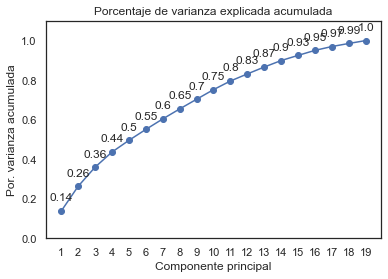

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df1[Var_continuas2].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df1[Var_continuas2].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

No se aprecia claramente ningún codo, es decir, todas las componentes aportan una cantidad necesaria de información para evaluar el modelo, por lo que en nuestro caso no tendría mucho sentido implementar este análisis de componentes principales ya que no se conseguiría el objetivo de reducir dimensiones eficientemente.
Se podría quedar con 12 componentes( o alguna más) para evaluar nuestros modelos, pero no se va a realizar debido a que pueden que se encuentren anomalías en nuestros modelos al haber podido despreciar información que sí era importante para nuestro objetivo de predecir la variable objetivo 'Price'.
Además mientras se han tratado los datos hemos decidido eliminar algunas variables muy correladas entre sí para tener las características que más información recogen, y también se han eliminado variables que estaban mínimamente correladas con el precio, por lo que al haberse realizado esto puede afectar a nuestr modelo PCA.
Por estas razones se decide no incluir el análisis de componentes principales a nuestro estudio, pero resilta interesante que quede constancia de él como método de aprendizaje no supervisado que en muchos otros tipos de problemas resulta verdaderamente útil y eficiente.
Ahora se va a proceder a realizar las transformaciones necesarias en nuestras variables categóricas para enriquecer nuestro objetivo:

### TRANSFORMACIONES

Tenemos un gran número de variables categóricas que vamos a querer transformarlas en variables que podemos manejar, lo cual serán variables continuas. Para ello vemos que hay variables que cuentan con un gran número de categorías distintas, por lo que usar hot encoder no nos va a servir de mucho. Vamos a utilizar una técnica de transformación que se basa en para cada categoría de una variable ver los resultados correspondientes a la variable objetivo, y asignarle su media. De esta manera vamos a poder codificar variables que tengan un gran número de categorías. 

Tenemos el problema que esto puede dar lugar a sobreajuste para variables con un pequeño número de categorías por lo que vamos a utilizar el parámetro 'smoothing' que es un proceso de suavizado y así disminuimos el sobreajuste.

In [114]:
from category_encoders import TargetEncoder
encoder=TargetEncoder(cols=Var_discretas,smoothing=1)
df1[Var_discretas]= encoder.fit_transform(df1[Var_discretas], df1['Price'])
df1[Var_discretas]

,Last Scraped,Experiences Offered,Host Since,Host Location,Host Response Time,Host Verifications,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,...,Property Type,Room Type,Bed Type,Calendar Updated,Calendar last Scraped,First Review,Last Review,Cancellation Policy,Geolocation,Features
0,259.968288,73.453363,58.180929,73.540122,73.550411,130.400000,73.540122,72.768471,259.968288,73.540122,...,78.491803,95.103944,73.943276,92.931702,331.574469,98.185185,64.846890,65.035782,73.540122,129.967742
1,68.495414,73.453363,85.909091,88.341317,73.550411,54.766038,149.147059,136.580645,115.277397,160.999990,...,72.067714,95.103944,73.943276,92.931702,67.858938,71.289474,79.777778,96.578947,73.540122,89.583090
2,68.495414,73.453363,85.909091,88.341317,73.550411,54.766038,149.147059,136.580645,115.277397,105.878041,...,72.067714,95.103944,73.943276,92.931702,67.858938,86.936116,86.954474,96.578947,73.540122,89.583090
3,68.495414,73.453363,187.736840,124.351852,73.550411,167.500000,149.147059,136.580645,115.277397,158.240000,...,72.067714,95.103944,73.943276,92.931702,67.858938,74.488372,76.837838,86.512365,73.540122,72.746714
4,68.495414,73.453363,118.311111,65.422529,73.550411,84.627869,124.935484,136.580645,115.277397,142.643485,...,72.067714,95.103944,73.943276,92.931702,67.858938,86.936116,86.954474,64.234853,73.540122,82.336533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,107.344778,73.453363,45.513329,101.023810,73.224582,84.627869,88.399876,100.714286,105.629630,73.540122,...,72.067714,95.103944,73.943276,64.354049,95.705880,163.918831,70.652882,86.512365,73.540122,129.967742
14776,100.133333,73.453363,77.703965,90.973925,71.954186,75.732639,83.490926,138.358194,100.527778,83.490926,...,38.626062,40.546738,73.943276,65.871734,114.789473,86.936116,86.954474,64.234853,73.540122,92.551020
14777,94.109589,73.453363,54.187506,65.422529,73.550411,84.627869,63.259375,138.358194,100.527778,76.938735,...,72.067714,95.103944,73.943276,64.354049,91.357143,46.750447,66.233400,86.512365,73.540122,206.747775
14778,96.173606,73.453363,65.098039,120.654322,73.224582,88.076834,73.540122,138.358194,120.654322,73.540122,...,72.067714,95.103944,73.943276,66.898515,96.173606,74.488372,57.468409,65.035782,73.540122,118.397541


Veo que efectivamente, hemos hecho la transformación a variables que vamos a ser capaces de manejar.

In [115]:
df1[Var_discretas].dtypes.to_dict()

{'Last Scraped': dtype('float64'),
 'Experiences Offered': dtype('float64'),
 'Host Since': dtype('float64'),
 'Host Location': dtype('float64'),
 'Host Response Time': dtype('float64'),
 'Host Verifications': dtype('float64'),
 'Neighbourhood Cleansed': dtype('float64'),
 'Neighbourhood Group Cleansed': dtype('float64'),
 'City': dtype('float64'),
 'Zipcode': dtype('float64'),
 'Smart Location': dtype('float64'),
 'Country Code': dtype('float64'),
 'Property Type': dtype('float64'),
 'Room Type': dtype('float64'),
 'Bed Type': dtype('float64'),
 'Calendar Updated': dtype('float64'),
 'Calendar last Scraped': dtype('float64'),
 'First Review': dtype('float64'),
 'Last Review': dtype('float64'),
 'Cancellation Policy': dtype('float64'),
 'Geolocation': dtype('float64'),
 'Features': dtype('float64')}

Vamos a ver la matriz de correlación, ya que ahora estamos tratando con variables continuas, y al haber hecho la transformación con Target Encoder, vamos a poder ver si existe correlación entre nuestras variables.

In [116]:
df_cord = df1[Var_discretas].corr(method='pearson')
df_cord

,Last Scraped,Experiences Offered,Host Since,Host Location,Host Response Time,Host Verifications,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,...,Property Type,Room Type,Bed Type,Calendar Updated,Calendar last Scraped,First Review,Last Review,Cancellation Policy,Geolocation,Features
Last Scraped,1.000000e+00,2.513564e-02,2.908936e-01,5.302278e-01,7.540813e-02,6.436255e-02,6.086988e-01,5.497869e-01,5.859526e-01,4.769183e-01,...,2.253502e-01,8.773793e-02,1.491035e-02,7.088104e-02,9.889345e-01,1.283113e-01,1.924363e-01,1.657102e-01,7.981776e-13,4.137147e-01
Experiences Offered,2.513564e-02,1.000000e+00,7.506132e-03,3.953601e-03,1.504822e-02,8.914121e-03,2.068962e-02,7.559844e-02,2.119122e-02,4.149775e-02,...,-5.040858e-03,9.319006e-03,3.833398e-03,2.369740e-03,2.864437e-02,3.532445e-02,2.362661e-02,2.044289e-02,5.095415e-12,8.428490e-02
Host Since,2.908936e-01,7.506132e-03,1.000000e+00,4.898555e-01,4.516587e-02,2.733563e-01,4.013794e-01,2.781862e-01,4.636442e-01,3.750683e-01,...,1.406708e-01,2.468956e-01,2.389414e-02,2.326851e-01,2.920899e-01,1.719540e-01,1.568461e-01,1.710226e-01,-1.704360e-15,2.828470e-01
Host Location,5.302278e-01,3.953601e-03,4.898555e-01,1.000000e+00,2.117157e-02,2.764968e-01,4.492067e-01,3.256487e-01,7.601882e-01,4.006410e-01,...,1.705107e-01,4.960280e-02,2.128497e-02,1.741655e-01,5.247323e-01,1.206922e-01,1.626678e-01,7.729845e-02,4.138934e-13,3.471707e-01
Host Response Time,7.540813e-02,1.504822e-02,4.516587e-02,2.117157e-02,1.000000e+00,-3.877291e-02,7.276896e-02,4.495446e-02,9.266729e-03,7.566439e-02,...,3.070691e-02,6.635743e-02,-4.104982e-03,-2.085204e-02,7.660848e-02,-4.163858e-02,-5.034706e-02,5.392978e-02,3.413544e-12,9.509562e-02
Host Verifications,6.436255e-02,8.914121e-03,2.733563e-01,2.764968e-01,-3.877291e-02,1.000000e+00,1.356915e-01,1.152161e-01,2.562651e-01,1.229057e-01,...,5.600523e-02,9.880326e-02,1.496827e-02,1.087655e-01,6.550878e-02,8.467604e-02,7.612907e-02,3.362436e-02,-2.167547e-13,1.656514e-01
Neighbourhood Cleansed,6.086988e-01,2.068962e-02,4.013794e-01,4.492067e-01,7.276896e-02,1.356915e-01,1.000000e+00,6.682343e-01,5.517371e-01,7.964896e-01,...,1.796324e-01,2.074109e-01,9.407994e-03,1.286957e-01,6.073428e-01,1.640704e-01,1.670297e-01,2.139691e-01,-2.122954e-13,3.427085e-01
Neighbourhood Group Cleansed,5.497869e-01,7.559844e-02,2.781862e-01,3.256487e-01,4.495446e-02,1.152161e-01,6.682343e-01,1.000000e+00,4.197902e-01,6.342878e-01,...,1.645053e-01,1.774667e-01,5.031997e-03,8.470528e-02,5.448181e-01,1.174695e-01,1.411315e-01,1.962757e-01,2.814171e-13,4.644082e-01
City,5.859526e-01,2.119122e-02,4.636442e-01,7.601882e-01,9.266729e-03,2.562651e-01,5.517371e-01,4.197902e-01,1.000000e+00,4.947655e-01,...,2.096546e-01,2.866132e-02,1.732300e-02,1.458459e-01,5.802839e-01,1.283950e-01,1.751045e-01,1.029131e-01,-4.957499e-13,3.637988e-01
Zipcode,4.769183e-01,4.149775e-02,3.750683e-01,4.006410e-01,7.566439e-02,1.229057e-01,7.964896e-01,6.342878e-01,4.947655e-01,1.000000e+00,...,1.888405e-01,1.920762e-01,6.268359e-03,1.246209e-01,4.753083e-01,1.437321e-01,1.489369e-01,2.028142e-01,4.149774e-14,3.285043e-01


Nos fijamos en las variables en las que existe una correlación elevada, para poder eliminar variables muy correlacionadas ya que no van a aportar mucha información al modelo.

In [117]:
corr2 = df1[Var_discretas].corr('pearson')
new_corr2 = corr2.abs()
new_corr2.loc[:,:] = np.tril(new_corr2, k=-1)
new_corr2 = new_corr2.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr2[new_corr2['correlation']>0.65]

,level_0,level_1,correlation
228,Smart Location,City,0.992753
352,Calendar last Scraped,Last Scraped,0.988935
204,Zipcode,Neighbourhood Cleansed,0.796490
223,Smart Location,Host Location,0.763409
179,City,Host Location,0.760188
160,Neighbourhood Group Cleansed,Neighbourhood Cleansed,0.668234
242,Country Code,Last Scraped,0.664608
363,Calendar last Scraped,Country Code,0.661463


In [118]:
correlation(df1[Var_discretas], 0.65)

['Neighbourhood Group Cleansed',
 'City',
 'Zipcode',
 'Smart Location',
 'Smart Location',
 'Country Code',
 'Calendar last Scraped',
 'Calendar last Scraped']

In [119]:
lista2 = set(correlation(df1[Var_discretas], 0.65))
variables_cord = list(lista2)
variables_cord

['Smart Location',
 'Calendar last Scraped',
 'Neighbourhood Group Cleansed',
 'Country Code',
 'Zipcode',
 'City']

Entre las correlaciones de Smart Location, City y Host Location nos indica que nos quedemos con la variable Host location para explicar la cantidad de información que expresan las 3 variables, sin embargo consideramos que para nuestro objetivo de predecir el precio de la casa nos interesa mucho más donde está ubicada la propia casa.
Por ello decidimos quedarnos con esta variable.
Acontinuación procedemos a eliminar estas variables de nuestra base de datos:

In [120]:
df1=df1.drop(columns=['City','Zipcode','Neighbourhood Group Cleansed','Host Location','Country Code',
                      'Calendar last Scraped'], axis=1)
df1.shape

(14780, 36)

De está forma ya hemos conseguido tener un dataset óptimo para evaluar nuestros modelos de predicción de precios de alojamientos.
Observamos como ha quedado finalmente:

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Scrape ID                  14780 non-null  int64  
 1   Last Scraped               14780 non-null  float64
 2   Experiences Offered        14780 non-null  float64
 3   Host ID                    14780 non-null  int64  
 4   Host Since                 14780 non-null  float64
 5   Host Response Time         14780 non-null  float64
 6   Host Response Rate         14780 non-null  float64
 7   Host Listings Count        14780 non-null  float64
 8   Host Verifications         14780 non-null  float64
 9   Neighbourhood Cleansed     14780 non-null  float64
 10  Smart Location             14780 non-null  float64
 11  Property Type              14780 non-null  float64
 12  Room Type                  14780 non-null  float64
 13  Accommodates               14780 non-null  int

## Desde aquí está limpio

# Creación, hiperparametrización y evaluación de modelos

### Dividir dataset

In [116]:
#Creación de train y test
from sklearn.model_selection import train_test_split
train , test = train_test_split(df1, test_size = 0.2)

x_train = train.drop('Price', axis=1)
y_train = train['Price']

x_test = test.drop('Price', axis = 1)
y_test = test['Price']

### Normalizar

In [117]:
# Normalización

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # ya no hace falta porque creo que normalizan en el preprocessing

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test) # solo transform porque es test
x_test = pd.DataFrame(x_test_scaled)

In [118]:
#Error rate
#Paquetes importados
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# Naive Regressor

Para tener la línea base más simple que se puede tener se va a crear un modelo que modele (válgase la redundancia) la variable de salida a partir de la media de los datos de entrenamiento. Este modelo equivaldría a un modelo lineal con tan solo un parámetro (el denominado en la diapositiva 3 de la presentación _III: Métodos de Regresión Lineal_ beta0)

In [119]:
y_train_pred_naive = np.repeat(np.mean(y_train), len(y_train))
y_test_pred_naive = np.repeat(np.mean(y_train), len(y_test))

In [120]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_naive)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_naive)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 72.31
Para los datos de test: 70.86


# KNN REGRESSION

In [121]:
# Importar función GridSearch
from sklearn.model_selection import GridSearchCV

In [122]:
from sklearn.neighbors import KNeighborsRegressor

# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
parameters = {'n_neighbors': [1,3,5,7,9]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(KNeighborsRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train, y_train)
# Mostrar los mejores hiperparámetros
print("El número de vecinos que optimiza el RMSE es: n_neighbors =", model.best_params_["n_neighbors"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = KNeighborsRegressor(n_neighbors = model.best_params_["n_neighbors"])
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train, y_train)

El número de vecinos que optimiza el RMSE es: n_neighbors = 5


KNeighborsRegressor()

In [123]:
y_train_pred_knn = model.predict(x_train)
y_test_pred_knn = model.predict(x_test)

In [124]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_knn)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_knn)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 36.63
Para los datos de test: 44.46


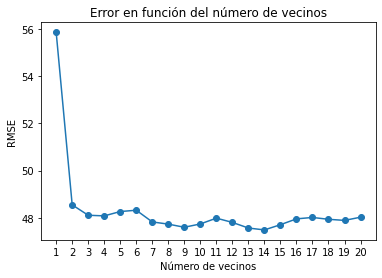

In [49]:
rmse_val = [] #Para guardar los valores de rmse para diferentes k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
#Graficar el valor RMSE y K valor
plt.plot(range(1,21), rmse_val)
plt.scatter(range(1,21), rmse_val)
plt.ylabel("RMSE")
plt.xticks(range(1,21))
plt.xlabel("Número de vecinos")
plt.title("Error en función del número de vecinos")
plt.show()

In [55]:
features_selected_knn = forward_selection(KNeighborsRegressor(n_neighbors=7), x_train, y_train, max_features=15)

# MultiLinear Regresión

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [52]:
y_train_pred_linear = model.predict(x_train)
y_test_pred_linear = model.predict(x_test)

In [53]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_linear)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_linear)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 43.26
Para los datos de test: 44.55


In [54]:
def forward_selection(model, x_train, y_train, max_features = np.inf):
    scores = []
    columns_selected = []
    for column in x_train.columns:
        model = model
        model.fit(np.array(x_train[column]).reshape(-1,1), y_train)
        scores.append(sqrt(mean_squared_error(model.predict(np.array(x_train[column]).reshape(-1,1)), y_train)))
    columns_selected.append(np.argmin(scores))
    for n_columns in range(len(x_train.columns)-2):
        if len(columns_selected) >= max_features:
            break
        scores = []
        for column in x_train.columns[~x_train.columns.isin(columns_selected)]:
            model = model
            model.fit(x_train[columns_selected + [column]], y_train)
            scores.append(sqrt(mean_squared_error(model.predict(x_train[columns_selected + [column]]), y_train)))
        columns_selected.append(x_train.columns[~x_train.columns.isin(columns_selected)][np.argmin(scores)])
    return columns_selected

In [181]:
features_selected_linear = forward_selection(LinearRegression(), x_train, y_train)

In [182]:
def plot_forward_selection_performance(model, features_selected, x_train, y_train, x_test, y_test, features_names, figsize=(10,4)):
    columns_considered = list()
    scores = []
    for column_considered in features_selected:
        columns_considered.append(column_considered)
        model = model
        if len(columns_considered)>1:
            model.fit(x_train[columns_considered], y_train)
            scores.append(sqrt(mean_squared_error(model.predict(x_test[columns_considered]), y_test)))
        else:
            model.fit(np.array(x_train[columns_considered]).reshape(-1,1), y_train)
            scores.append(sqrt(mean_squared_error(model.predict(np.array(x_test[columns_considered]).reshape(-1,1)), y_test)))
    plt.figure(figsize = figsize)
    plt.plot(features_names[features_selected], scores)
    plt.ylabel("RMSE")
    plt.xlabel("Feature added")
    plt.xticks(rotation = 45, ha = "right", fontsize = 10)
    plt.show()

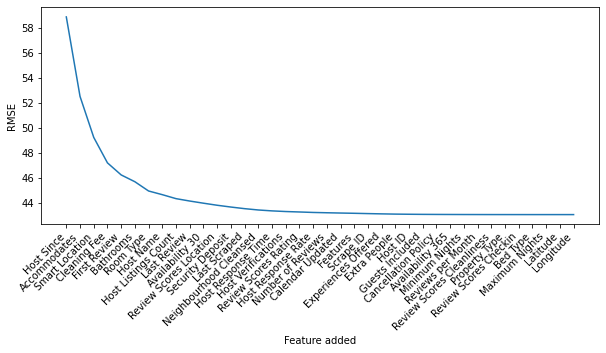

In [183]:
plot_forward_selection_performance(LinearRegression(), features_selected_linear, x_train, y_train, x_train, y_train, train.drop('Price', axis=1).columns)

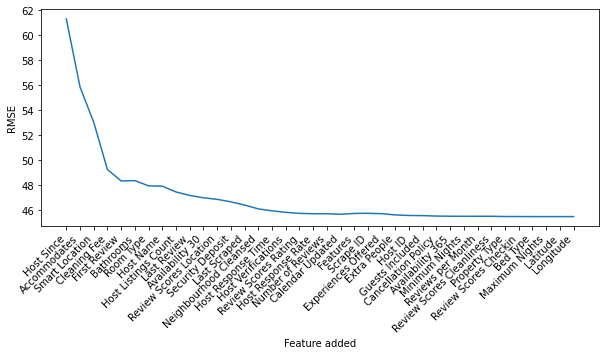

In [184]:
plot_forward_selection_performance(LinearRegression(), features_selected_linear, x_train, y_train, x_test, y_test, train.drop('Price', axis=1).columns)

## Decision Tree Regressor

In [163]:
from sklearn.tree import DecisionTreeRegressor
# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
parameters = {'max_depth': [3,5,7,9]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(DecisionTreeRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train, y_train)
# Mostrar los mejores hiperparámetros
print("El número de vecinos que optimiza el RMSE es: max_depth =", model.best_params_["max_depth"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = DecisionTreeRegressor(max_depth = model.best_params_["max_depth"])
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train, y_train)

El número de vecinos que optimiza el RMSE es: max_depth = 5


DecisionTreeRegressor(max_depth=5)

In [164]:
y_train_pred_tree = model.predict(x_train)
y_test_pred_tree = model.predict(x_test)

In [165]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_tree)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_tree)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 41.36
Para los datos de test: 48.91


# Random Forest Regression

In [186]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
 
# fit the regressor with x and y data
model.fit(x_train, y_train) 

RandomForestRegressor(random_state=42)

In [187]:
y_train_pred_rf = model.predict(x_train)
y_test_pred_rf = model.predict(x_test)

In [188]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_rf)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_rf)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 13.76
Para los datos de test: 37.5


# XGboost Regression

In [114]:
from xgboost import XGBRFRegressor

In [169]:
 # create regressor object
model = XGBRFRegressor(n_estimators = 100, random_state = 42)
 
# fit the regressor with x and y data
model.fit(x_train, y_train) 

/Users/angela/miniconda3/envs/ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=42, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [170]:
y_train_pred_xgb = model.predict(x_train)
y_test_pred_xgb = model.predict(x_test)

In [171]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_xgb)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_xgb)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 34.5
Para los datos de test: 44.64


# Neural Network

In [172]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()

In [173]:
model.fit(x_train, y_train) 

/Users/angela/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [174]:
y_train_pred_nn = model.predict(x_train)
y_test_pred_nn = model.predict(x_test)

In [175]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_nn)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_nn)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 41.77
Para los datos de test: 44.2


## Hasta aquí está limpio